<a href="https://colab.research.google.com/github/nitrogenlab/gp15wmascripts/blob/main/notebooks/Replicating_pyompa_base_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Install pyompa
!pip uninstall -y pyompa
%cd /content/
!rm -rf pyompa
!git clone https://github.com/nitrogenlab/pyompa
%cd /content/pyompa
!git checkout dev
!git log -1
!pip install .
%cd /content/


%reload_ext autoreload
%autoreload 2
from importlib import reload
import pyompa
reload(pyompa)

Found existing installation: pyompa 0.4.0.0
Uninstalling pyompa-0.4.0.0:
  Successfully uninstalled pyompa-0.4.0.0
/content
Cloning into 'pyompa'...
remote: Enumerating objects: 1334, done.
remote: Counting objects: 100% (642/642), done.
remote: Compressing objects: 100% (429/429), done.
remote: Total 1334 (delta 456), reused 375 (delta 210), pack-reused 692
Receiving objects: 100% (1334/1334), 14.92 MiB | 30.75 MiB/s, done.
Resolving deltas: 100% (942/942), done.
/content/pyompa
Branch 'dev' set up to track remote branch 'dev' from 'origin'.
Switched to a new branch 'dev'
commit a689c6b75c5fdb559be903bf90766dc150c64e71 (HEAD -> dev, origin/dev)
Author: Av Shrikumar <avanti.shrikumar@gmail.com>
Date:   Sat Dec 11 21:26:25 2021 -0800

    bugfix
Processing /content/pyompa
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new b

<module 'pyompa' from '/usr/local/lib/python3.7/dist-packages/pyompa/__init__.py'>

In [1]:
#Install gp15wmascripts
!pip uninstall -y gp15wma
%cd /content/
!rm -rf gp15wmascripts
!git clone https://github.com/nitrogenlab/gp15wmascripts
%cd /content/gp15wmascripts
!git checkout main
!git log -1
!pip install .
%cd /content/

%reload_ext autoreload
%autoreload 2
from importlib import reload
import gp15wma
reload(gp15wma)

Found existing installation: gp15wma 0.1.0.0
Uninstalling gp15wma-0.1.0.0:
  Successfully uninstalled gp15wma-0.1.0.0
/content
Cloning into 'gp15wmascripts'...
remote: Enumerating objects: 116, done.
remote: Counting objects: 100% (116/116), done.
remote: Compressing objects: 100% (87/87), done.
remote: Total 116 (delta 62), reused 66 (delta 26), pack-reused 0
Receiving objects: 100% (116/116), 21.84 KiB | 7.28 MiB/s, done.
Resolving deltas: 100% (62/62), done.
/content/gp15wmascripts
Already on 'main'
Your branch is up to date with 'origin/main'.
commit 55cb56031d300583b842983655ac640263ebbb33 (HEAD -> main, origin/main, origin/HEAD)
Merge: bd90fbb 500066c
Author: rml54 <45828236+rml54@users.noreply.github.com>
Date:   Fri Jan 28 14:54:52 2022 -0700

    Merge pull request #3 from nitrogenlab/patch-1
    
    bug fix adding .endmemberpenaltyfunc
Processing /content/gp15wmascripts
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying 

ImportError: ignored

In [ ]:
gp15_df, gp15_intermediateanddeep, gp15_thermocline = gp15wma.download_and_load_gp15_data(
    station_to_tc_cutoffs_url="https://raw.githubusercontent.com/nitrogenlab/GP15_watermassanalysis/main/station_to_tc_cutoffs.json")

In [ ]:
interanddeep_endmember_df = gp15wma.load_interanddeep_endmember_df(
    df_url="https://raw.githubusercontent.com/nitrogenlab/GP15_watermassanalysis/main/GP15_mode_waters_intermediateanddeep_endmemberswithsubtypes.csv",
    df_file_name="GP15_intermediateanddeep.csv")


In [3]:
base_soln = gp15wma.get_pyompa_soln(
    obs_df=gp15_intermediateanddeep, endmember_df_touse=interanddeep_endmember_df)

NameError: ignored

In [ ]:
withoutsilicate_soln = gp15wma.get_pyompa_soln(
    obs_df=gp15_intermediateanddeep, endmember_df_touse=interanddeep_endmember_df,
    param_names=['conservative_temp', 'absolute_salinity',
                 'nitrate', 'phosphate', 'oxygen'])

param_weightings is None; using defaults:
{'conservative_temp': 56.0, 'absolute_salinity': 80.0, 'silicate': 3.0, 'nitrate': 5.0, 'phosphate': 5.0, 'oxygen': 1.0, 'NO': 1.0, 'PO': 0.5}
convertedparam_groups is None; using defaults
usagepenalty is None; using defaults
{'ENPCW_0': <pyompa.endmemberpenaltyfunc.EndMemExpPenaltyFunc object at 0x7f992d2b3390>, 'ENPCW_1': <pyompa.endmemberpenaltyfunc.EndMemExpPenaltyFunc object at 0x7f992d2ae9d0>, 'SPCW_0': <pyompa.endmemberpenaltyfunc.EndMemExpPenaltyFunc object at 0x7f992cce04d0>, 'SPCW_1': <pyompa.endmemberpenaltyfunc.EndMemExpPenaltyFunc object at 0x7f992cce0190>, 'PSUW_0': <pyompa.endmemberpenaltyfunc.EndMemExpPenaltyFunc object at 0x7f992cc6e210>, 'PSUW_1': <pyompa.endmemberpenaltyfunc.EndMemExpPenaltyFunc object at 0x7f992cc6e1d0>, 'ESSW_0': <pyompa.endmemberpenaltyfunc.EndMemExpPenaltyFunc object at 0x7f992cd2eb50>, 'ESSW_1': <pyompa.endmemberpenaltyfunc.EndMemExpPenaltyFunc object at 0x7f992cc73190>, 'EqIW_0': <pyompa.endmemberpenalt

with silicate


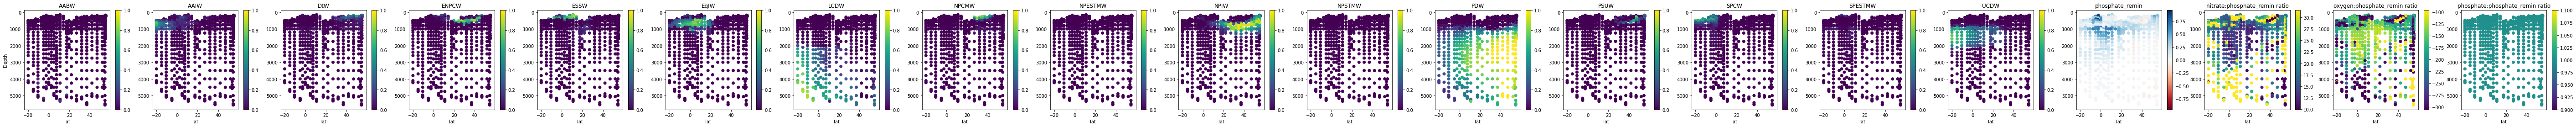

without silicate


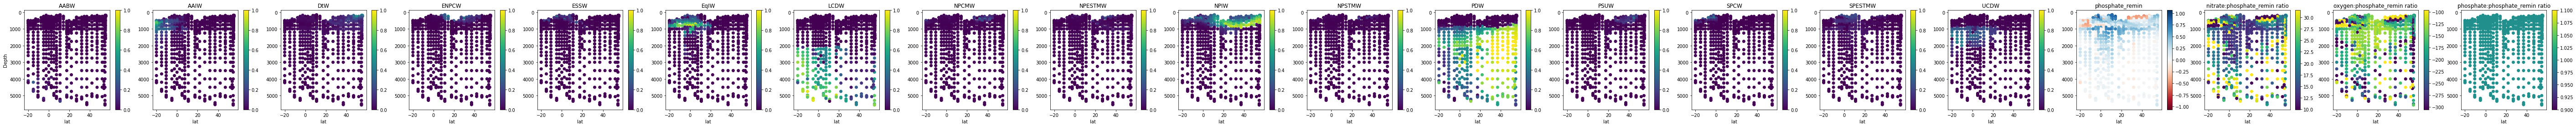

In [ ]:
#plot the solutions
print("with silicate")
pyompa.plot_ompasoln_endmember_fractions(ompa_soln=withsilicate_soln,
                                  xaxis_colname="lat",
                                  yaxis_colname="Depth",
                                  group_endmembers=True)
print("without silicate")
pyompa.plot_ompasoln_endmember_fractions(ompa_soln=withoutsilicate_soln,
                                  xaxis_colname="lat",
                                  yaxis_colname="Depth",
                                  group_endmembers=True)


with silicate


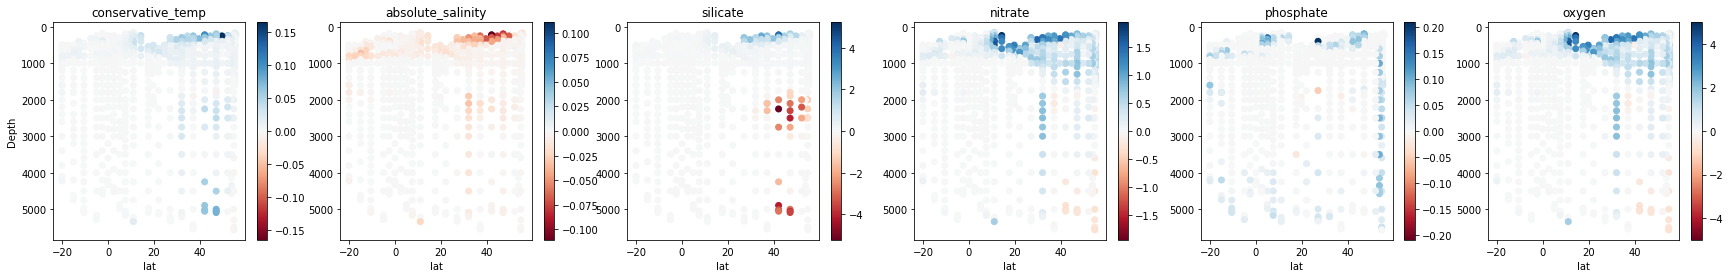

without silicate


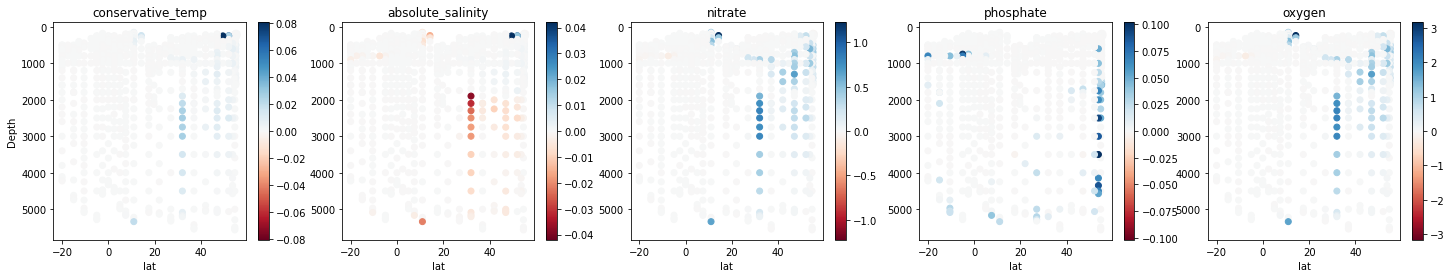

In [ ]:
print("with silicate")
pyompa.plot_ompasoln_residuals(ompa_soln=withsilicate_soln,
                                  xaxis_colname="lat",
                                  yaxis_colname="Depth")
print("without silicate")
pyompa.plot_ompasoln_residuals(ompa_soln=withoutsilicate_soln,
                                  xaxis_colname="lat",
                                  yaxis_colname="Depth")

In [ ]:
from pyompa.ompacore import ExportToCsvMixin
import numpy as np

predsilicate_wosilicate = withoutsilicate_soln.get_predicted_conserved_prop_vals(
    endmember_to_property=dict(zip(interanddeep_endmember_df['watermass_name'],
                                   interanddeep_endmember_df['silicate'])))

predsilicate_withsilicate = withsilicate_soln.get_predicted_conserved_prop_vals(
    endmember_to_property=dict(zip(interanddeep_endmember_df['watermass_name'],
                                   interanddeep_endmember_df['silicate'])))

true_silicate = np.array(gp15_intermediateanddeep["silicate"])

residsilicate_wosilicate = predsilicate_wosilicate-true_silicate
residsilicate_withsilicate = predsilicate_withsilicate-true_silicate

Silicate Residuals with silicate included


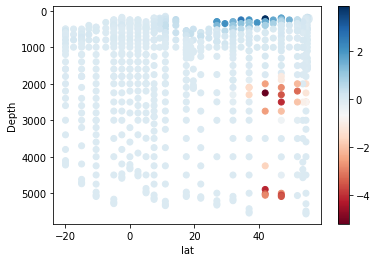

Silicate residuals without silicate included


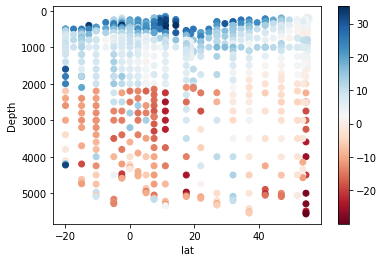

Magnitude difference


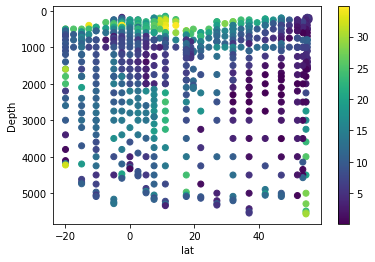

In [ ]:
from matplotlib import pyplot as plt

def make_plot(lat_vals, depth_vals, c):
    if (np.min(c) < 0):
      cmap="RdBu"
    else:
      cmap="viridis"
    plt.scatter(lat_vals,
                depth_vals,                                     
                c=c, cmap=cmap)
    plt.xlabel("lat")
    plt.ylabel("Depth")
    plt.ylim(plt.ylim()[1], plt.ylim()[0])
    plt.colorbar()
    plt.show()

print("Silicate Residuals with silicate included")
make_plot(lat_vals=withsilicate_soln.obs_df["lat"],
          depth_vals=withsilicate_soln.obs_df["Depth"],
          c=residsilicate_withsilicate)


print("Silicate residuals without silicate included")
make_plot(lat_vals=withoutsilicate_soln.obs_df["lat"],
          depth_vals=withoutsilicate_soln.obs_df["Depth"],
          c=residsilicate_wosilicate)

print("Magnitude difference")
make_plot(lat_vals=withsilicate_soln.obs_df["lat"],
          depth_vals=withsilicate_soln.obs_df["Depth"],
          c=np.abs(residsilicate_wosilicate)-np.abs(residsilicate_withsilicate))